In [ ]:

#Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture- based control systems.


In [2]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.12G/2.13G [00:20<00:00, 127MB/s]
100% 2.13G/2.13G [00:20<00:00, 112MB/s]


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!unzip leapgestrecog.zip -d Data_hand_gesture

Streaming output truncated to the last 5000 lines.
  inflating: Data_hand_gesture/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: Data_hand_gesture/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: Data_hand_gesture/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: Data_hand_gesture/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: Data_hand_gesture/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: Data_hand_gesture/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: Data_hand_gesture/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: Data_hand_gesture/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: Data_hand_gesture/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: Data_hand_gesture/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflati

In [9]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the unzipped dataset
dataset_path = '/content/Data_hand_gesture'

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Adjust based on number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=15,
    validation_data=validation_generator
)

Epoch 1/15
1000/1000 [==============================] - 381s 380ms/step - loss: 0.6935 - accuracy: 0.4953 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
1000/1000 [==============================] - 381s 381ms/step - loss: 0.6932 - accuracy: 0.4964 - val_loss: 0.6931 - val_accuracy: 0.4994
Epoch 3/15
1000/1000 [==============================] - 368s 368ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/15
1000/1000 [==============================] - 373s 373ms/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/15
1000/1000 [==============================] - 405s 405ms/step - loss: 0.6932 - accuracy: 0.4983 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/15
1000/1000 [==============================] - 403s 403ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/15
1000/1000 [==============================] - 376s 376ms/step - loss: 0.6932 - accuracy: 0.5004 - val_

In [12]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

250/250 [==============================] - 47s 186ms/step - loss: 0.6932 - accuracy: 0.5000
Validation Accuracy: 50.00%


In [13]:
model.save('/content/drive/My Drive/saved_models/gesture_model.h5')

# Print confirmation message
print(f'Model saved successfully at /content/drive/My Drive/saved_models/gesture_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at /content/drive/My Drive/saved_models/gesture_model.h5


In [15]:
from tensorflow.keras.models import load_model

# Load the pre-trained model from Google Drive
model_path = '/content/drive/My Drive/saved_models/gesture_model.h5'
model = load_model(model_path)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

Saving Peace.jpeg to Peace (1).jpeg
1/1 [==============================] - 0s 23ms/step


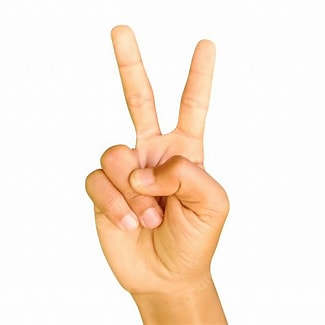

Predicted Gesture: Peace


In [19]:
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image, display

# Function to upload and predict
def upload_and_predict():
    try:
        # Upload file and get file path
        uploaded = files.upload()
        file_path = list(uploaded.keys())[0]  # Assuming only one file is uploaded

        # Load uploaded image or video frame
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB (if needed)
        img = cv2.resize(img, (64, 64))  # Resize image to model's input shape
        img = img.astype('float32') / 255.0  # Normalize pixel values
        img = np.expand_dims(img, axis=0)  # Add batch dimension

        # Predict gesture
        predictions = model.predict(img)
        class_index = np.argmax(predictions)
        class_label = class_labels[class_index]

        # Display uploaded image and prediction
        display(Image(file_path))
        print("Predicted Gesture:", class_label)

    except Exception as e:
        print(f"Error: {str(e)}")

class_labels = {
    0: 'Fist',
    1: 'Five',
    2: 'Point',
    3: 'Swing',
    4: 'Ok',
    5: 'Peace',
    6: 'Rock',
    7: 'Thumb'
}
upload_and_predict()